# Sentiment Analysis of Usernames and Titles on YouTube and Twitch: Exploratory Data Analysis

This notebook explores the discriptive statistics of username and title data.

The data is from  YouTube and Twitch for the period of the 28th of May 2021 till the 28th of July 2021. 


## Setting up environments

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=daa955ace2b5f6464162a2aa0cd408353d0c775e057748b3f8f04cc30fe38331
  Stored in directory: /tmp/pip-ephem-wheel-cache-ipjo0rr4/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
pip install scipy

## Ingesting Twitch and YouTube Data

In [ ]:
!wget https://github.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/blob/main/data/twitch_data.csv.zip?raw=true

--2021-09-19 17:03:27--  https://github.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/blob/main/data/twitch_data.csv.zip?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/raw/main/data/twitch_data.csv.zip [following]
--2021-09-19 17:03:28--  https://github.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/raw/main/data/twitch_data.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/main/data/twitch_data.csv.zip [following]
--2021-09-19 17:03:28--  https://raw.githubusercontent.com/JefNtungila/Sentiment-Analysis-of-Usern

In [ ]:
!unzip twitch_data.csv.zip?raw=true

Archive:  twitch_data.csv.zip?raw=true
  inflating: twitch_data.csv         
  inflating: __MACOSX/._twitch_data.csv  


In [ ]:
import pandas as pd

#reading in data from YouTube and Twitch

twitch_data = pd.read_csv('twitch_data.csv')
youtube_data = pd.read_csv('https://raw.githubusercontent.com/JefNtungila/Sentiment-Analysis-of-Usernames-and-Titles-on-YouTube-and-Twitch/main/data/youtube_data.csv')

In [ ]:
twitch_data.head()

,Unnamed: 0,reference_index,user_name,game_name,title,viewer_count,started_at,api_call_time,date_api_call_time,hour_api_call_time,tokenised_title,tokenised_titles_with_stopwords,genre,words_in_names
0,0,0,xQcOW,Slots,+18 !stake MAN GAMBLES HIS 401K AWAY IN MINUTES,129226,2021-05-27 19:51:09,2021-05-28T00:06:02.506991,2021-05-28,0,"['stake', 'man', 'gambles', 'k', 'away', 'minu...","['stake', 'man', 'gambles', 'his', 'k', 'away'...",Misc,"['cow', 'ow']"
1,1,1,RanbooLive,Life is Strange,Being strange? Idk I sure hope it does! (TW FO...,73898,2021-05-27 21:30:04,2021-05-28T00:06:02.506991,2021-05-28,0,"['strange', 'idk', 'sure', 'hope', 'tw', 'unse...","['being', 'strange', 'idk', 'i', 'sure', 'hope...",Adventure,"['bo', 'olive', 'li', 'live', 'ra', 'liv', 'bo..."
2,2,2,Sykkuno,Grand Theft Auto V,yuno does the things !,47311,2021-05-27 17:31:32,2021-05-28T00:06:02.506991,2021-05-28,0,"['yuno', 'things']","['yuno', 'does', 'the', 'things']",Action,['un']
3,3,3,shroud,Conan Exiles,[drops enabled] !Conan Exiles Isle of Siptah #...,43402,2021-05-27 14:52:19,2021-05-28T00:06:02.506991,2021-05-28,0,"['drops', 'enabled', 'conan', 'exiles', 'isle'...","['drops', 'enabled', 'conan', 'exiles', 'isle'...",Action-Adventure,"['ro', 'sh', 'roud', 'ud']"
4,4,4,loltyler1,League of Legends,ANGER HIM ! AND WHAT happen ? well finder the ...,40083,2021-05-27 15:58:13,2021-05-28T00:06:02.506991,2021-05-28,0,"['anger', 'happen', 'finder', 'way', 'outs', '...","['anger', 'him', 'and', 'what', 'happen', 'wel...",Strategy,"['tyler', 'lo', 'ler', 'er']"


In [ ]:
youtube_data.head()

,Unnamed: 0,reference_index,username,video_title,publish_time,view_count,comment_count,like_count,dislike count,api_call_time,date_api_call_time,hour_api_call_time,tokenised_title,tokenised_titles_with_stopwords,genre,words_in_names
0,0,0,The Late Show with Stephen Colbert,BTS &quot;Butter&quot; - The Late Show with St...,2021-05-26T04:30:13Z,8956580,45039,1181534,7794,2021-05-28T14:37:07.257966,2021-05-28,14,"['bts', 'butter', 'late', 'stephen', 'colbert']","['bts', 'butter', 'the', 'late', 'show', 'with...",Traditional Media,"['st', 'ber', 'en', 'sho', 'stephe', 'lat', 'l..."
1,1,1,SORRYLAG,The Legend of Zelda: Breath of the Lag,2021-05-27T16:30:08Z,179083,2931,38157,115,2021-05-28T14:37:07.257966,2021-05-28,14,"['legend', 'zelda', 'breath', 'lag']","['the', 'legend', 'of', 'zelda', 'breath', 'of...",Youtuber,"['lag', 'la', 'sorry']"
2,2,2,clay4Kiki,Friday Night Funkin&#39; - Tricky&#39;s clown ...,2021-05-26T18:02:40Z,1141709,406,13979,791,2021-05-28T14:37:07.257966,2021-05-28,14,"['friday', 'night', 'funkin', 'trickys', 'clow...","['friday', 'night', 'funkin', 'trickys', 'clow...",Traditional Media,"['kiki', 'lay', 'ay', 'la', 'clay']"
3,3,3,Bella Poarch,Bella Poarch - Build a B*tch (Official Music V...,2021-05-14T04:00:16Z,114633627,357833,6571631,209116,2021-05-28T14:37:07.257966,2021-05-28,14,"['bella', 'poarch', 'build', 'btch', 'official...","['bella', 'poarch', 'build', 'a', 'btch', 'off...",Music,"['el', 'poa', 'ella', 'arch', 'la', 'bell', 'p..."
4,4,4,JustinBieberVEVO,Justin Bieber - Peaches / Hold On (Live On The...,2021-05-27T17:33:27Z,642903,6597,76591,757,2021-05-28T14:37:07.257966,2021-05-28,14,"['justin', 'bieber', 'peaches', 'hold', 'live'...","['justin', 'bieber', 'peaches', 'hold', 'on', ...",Traditional Media,"['ju', 'ust', 'st', 'er', 'ti', 'tin', 'ber', ..."


In [ ]:
# Exploring Twitch Data

## Username Statistics

In [ ]:
twitch_data.columns.values

array(['Unnamed: 0', 'reference_index', 'user_name', 'game_name', 'title',
       'viewer_count', 'started_at', 'api_call_time',
       'date_api_call_time', 'hour_api_call_time', 'tokenised_title',
       'tokenised_titles_with_stopwords', 'genre', 'words_in_names'],
      dtype=object)

In [ ]:
#finding count unique usernames
#finding count unique words in usernames
twitch_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,139500,NaN,NaN,NaN,69749.5,40270.3,0,34874.8,69749.5,104624,139499
reference_index,139500,NaN,NaN,NaN,49.5,28.8662,0,24.75,49.5,74.25,99
user_name,139500,4062,ops1x,937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_name,138386,1378,Grand Theft Auto V,12780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,139043,43567,Ramee | !Twitter | Chang Gang | NoPixel,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viewer_count,139500,NaN,NaN,NaN,7108.38,12417.7,0,2254,3430,6788,400648
started_at,139500,34500,2021-06-17 08:00:29,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
api_call_time,139500,1395,2021-06-12T02:06:03.054095,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_api_call_time,139500,62,2021-06-18,2800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour_api_call_time,139500,NaN,NaN,NaN,11.8222,6.80187,0,6,12,18,23


In [ ]:
#filtering dataset for unique usernames

twitch_names = twitch_data.drop_duplicates(subset = ['user_name'])

In [ ]:
#finding how many observation did not contain any English words
twitch_data['words_in_names'].value_counts()[:20]

['es']                                                                                                                                     994
[]                                                                                                                                         967
['classy', 'bee', 'lass', 'las', 'class', 'beef', 'la', 'ass']                                                                             905
['smit', 'smite', 'mite', 'ame', 'gam', 'game', 'ga', 'teg', 'te', 'mi']                                                                   817
['pes', 'es', 'til', 'st', 'ti', 'ly', 'pest']                                                                                             753
['sum', 'mi', 'es', 'yo', 'um', 'bey', 'summit', 'ey', 'yond', 'yon', 'th']                                                                627
['ar', 'ma', 'mar', 'ark', 'mark']                                                                                                         595

In [ ]:
import numpy as np

#count of words found in usernames
len_words_twitch = []

#eval becuase github transformed list into string

for words in twitch_names['words_in_names'].tolist():
  try:
    len_words_twitch.append(len(eval(words)))
  except:
    len_words_twitch.append(0)

#produce mean of words in list of length of words
np.median(len_words_twitch)

6.0

In [ ]:
len(len_words_twitch)

4062

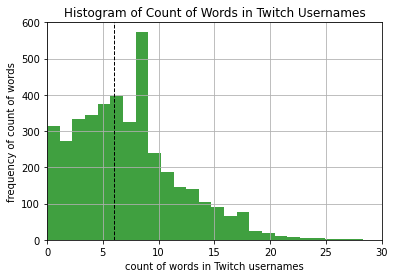

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# the histogram of the frequency of count of words in Twitch usernames data
plot = plt.hist(len_words_twitch, bins = 30, facecolor='green', alpha=0.75)
plt.axvline(np.median(len_words_twitch), color='k', linestyle='dashed', linewidth=1)




plt.xlabel('count of words in Twitch usernames')
plt.ylabel('frequency of count of words')
plt.title('Histogram of Count of Words in Twitch Usernames')

plt.xlim(0, 30)
plt.ylim(0, 600)

plt.grid(True)
plt.show()

## Most occuring words on Twitch

high level overview of words for EDA

In [ ]:
#filtering for uniques streams with highest viewership
twitch_data_unique = twitch_data.sort_values(by='viewer_count', ascending = False).drop_duplicates(subset=['user_name','title']).sort_index()

In [ ]:
#creating word counter
#eval to handle lists encoded as strings by GitHub

word_cnt_twitch = {}
for words in twitch_data_unique['tokenised_title']: ##looping through the docs 
    for word in eval(words): #looping through the tokens
        if word not in word_cnt_twitch:
            word_cnt_twitch[word] = 1
        else:
            word_cnt_twitch[word] += 1

#have to use key,value pairs because dataframe method requires a dictionary of lists    
word_cnt_df_twitch = pd.DataFrame({'word': [k for k in word_cnt_twitch.keys()], 'cnt': [v for v in word_cnt_twitch.values()]})
len(word_cnt_df_twitch)

23110

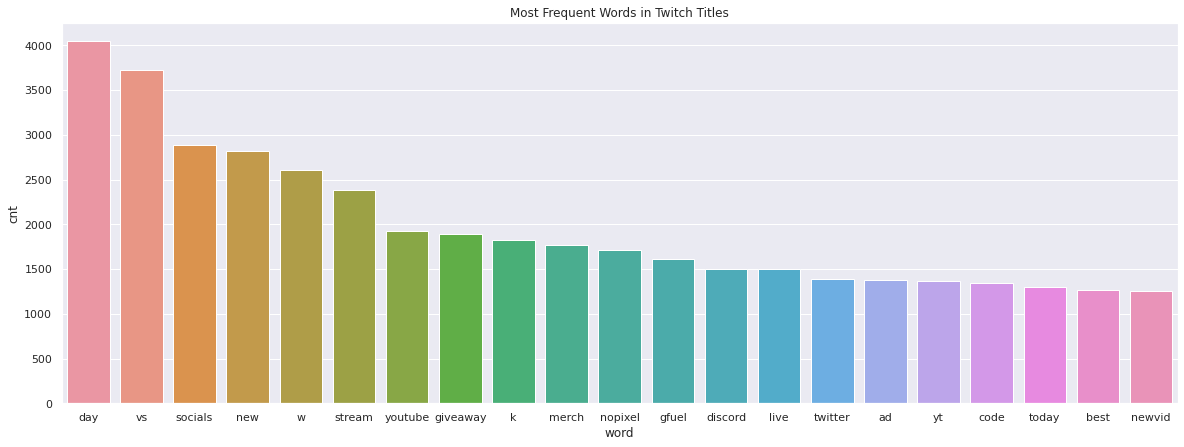

In [ ]:
import seaborn as sns

#plotting top words that appear more than 1000 times in the data

top_words_twitch = word_cnt_df_twitch[word_cnt_df_twitch['cnt'] > 1200].sort_values(by='cnt', ascending=False)
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.barplot(x = 'word', y='cnt', data = top_words_twitch).set(title='Most Frequent Words in Twitch Titles')

## Wordcloud of words on Twitch 

Quick understanding of most words in the text, high level understanding of prevalent words and hence heuristice for prevalent sentiment

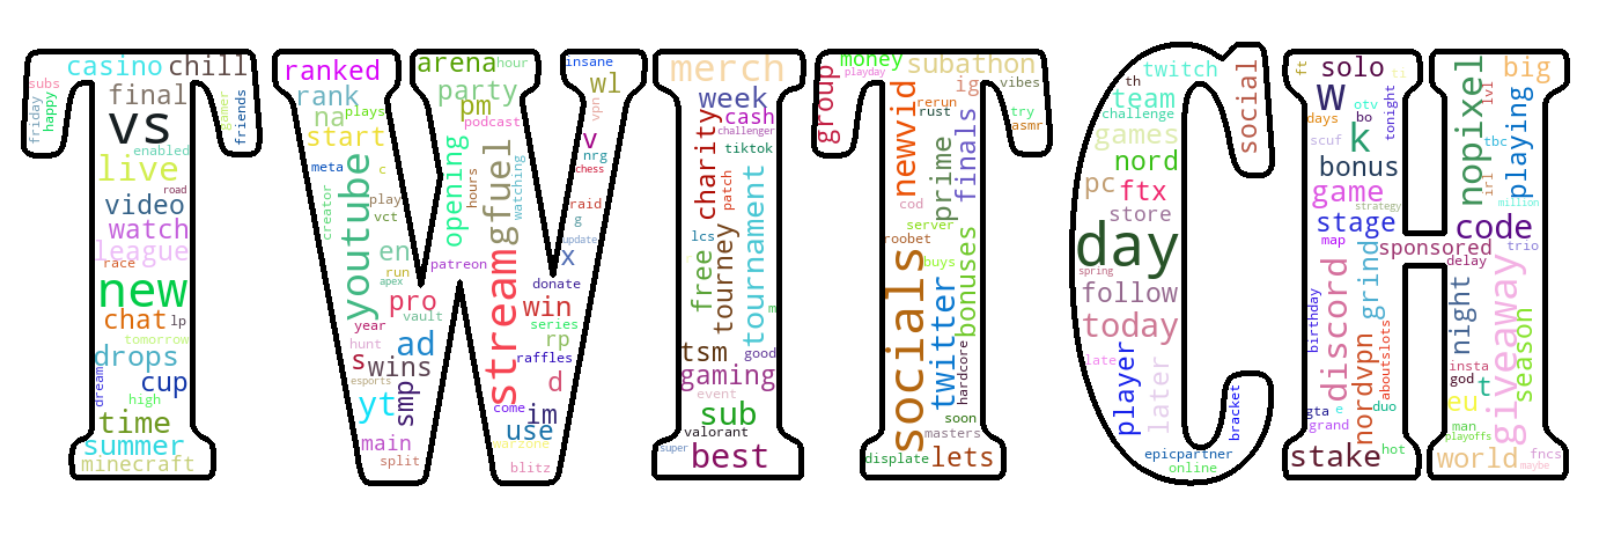

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np
import random

#getting tokenised titles
text_twitch = twitch_data_unique['tokenised_title']
mask = np.array(Image.open('/content/drive/MyDrive/twitch.png'))

wordcloud_twitch = WordCloud(mask=mask,width=mask.shape[1],
               height=mask.shape[0], background_color='white', contour_color='black',
               contour_width=5, 
               #colour funtion using random functions 
               color_func=lambda *args, **kwargs: (random.randint(0,250),random.randint(0,250),random.randint(0,250)),
               #seed for scientific replicability of results
               #using count to produce word cloud based on occurence
                max_words=200, max_font_size=512, random_state=42).generate_from_frequencies(word_cnt_twitch)

#setting figure shape
figure(figsize=(30, 10))


#producing plot
plt.imshow(wordcloud_twitch, interpolation='bilinear')
plt.axis('off')
plt.show()




Example of title that uses username

In [ ]:
twitch_data[twitch_data['title'] == 'Connecting with Cloud9 Presented by AT&T - C9 LCS Edition #ATTC9Fam']

,reference_index,user_name,game_name,title,viewer_count,started_at,api_call_time,date_api_call_time,hour_api_call_time,tokenised_title,genre
41217,17,ATT,League of Legends,Connecting with Cloud9 Presented by AT&T - C9 LCS Edition #ATTC9Fam,7913,2021-06-14 01:21:00,2021-06-14T03:06:06.947044,2021-06-14,3,"[connecting, cloud, presented, att, c, lcs, edition, attcfam]",Strategy


## Co-occurence Network Graph

Understanding which words are central can give indication to what emotion is central

In [ ]:
import re
import itertools
import unicodedata
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [ ]:

#creating NEW word counter because of richness of corpus
#filtering for just chatting


word_cnt = {}

for words in twitch_data_unique[twitch_data_unique['game_name'] == 'Just Chatting']['tokenised_title']: #looping through the docs
    for word in eval(words): #looping through the tokens
        if word not in word_cnt:
            word_cnt[word] = 1 #new word start counter
        else:
            word_cnt[word] += 1 #seen word add one to the counter

#looping through key valuee pairs because only one value per key in dict and no list    
word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
len(word_cnt_df)

5965

In [ ]:
word_cnt_df[:19]

,word,cnt
0,new,288
1,couple,6
2,chicken,12
3,day,290
4,texas,23
5,podcast,48
6,housewives,1
7,person,4
8,hardcore,9
9,chess,27


In [ ]:
vocab = {}
#dictionary of most frequent words
#aim for 60 words

#covert to numpy array in order to be able to impute results

target_words = word_cnt_df[word_cnt_df['cnt'] > 80]['word'].to_numpy()

for word in target_words:
    if word not in vocab:
      #appending word: and count of when it happened
      vocab[word] = len(vocab)

re_vocab = {}
for word, i in vocab.items():
    re_vocab[i] = word
    
len(vocab)

35

In [ ]:
#creating all possible token combinations of tokens in unique docs
#combination  matrices are also known as co-occurence matrices
#need to use to deal with GitHub formatting lists as strings

title_combinations = [list(itertools.combinations(eval(words), 2)) for words in twitch_data_unique[twitch_data_unique['game_name'] == 'Just Chatting']['tokenised_title']]
combination_matrix = np.zeros((len(vocab), len(vocab)))

for title_comb in title_combinations:
    for comb in title_comb:
       #if both tokens are top word 
        if comb[0] in target_words and comb[1] in target_words:
          #place key,value of top words in vocab in comb matrix 
          #add one to indicate count of occurence
            combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
            combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1

       
for i in range(len(vocab)):
  #compensating for duplication of results on main diagonal where key, value is value,key
    combination_matrix[i, i] /= 2
        
combination_matrix

array([[15., 20.,  2., ...,  3.,  4., 17.],
       [20.,  6.,  1., ..., 64.,  4.,  2.],
       [ 2.,  1.,  0., ...,  4.,  5.,  0.],
       ...,
       [ 3., 64.,  4., ..., 33.,  0.,  0.],
       [ 4.,  4.,  5., ...,  0.,  1.,  2.],
       [17.,  2.,  0., ...,  0.,  2.,  0.]])

In [ ]:
#computing spacial distance
#the degree of coocurrence was set using the jacard similarity coefficient
#which ranges from 0 to 1 with 0, no similarity and 1 complete overlap

jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.08571429, 0.        , ..., 0.08571429, 0.02857143,
        0.        ],
       [0.08571429, 1.        , 0.        , ..., 0.08823529, 0.08571429,
        0.02941176],
       [0.        , 0.        , 1.        , ..., 0.07692308, 0.06666667,
        0.09090909],
       ...,
       [0.08571429, 0.08823529, 0.07692308, ..., 1.        , 0.03333333,
        0.07692308],
       [0.02857143, 0.08571429, 0.06666667, ..., 0.03333333, 1.        ,
        0.03571429],
       [0.        , 0.02941176, 0.09090909, ..., 0.07692308, 0.03571429,
        1.        ]])

In [ ]:
nodes = []

#creating nodes for each combo of words

#jaccard matrix matches ordered re_vocab dictionary

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
          #node_x, node_y, node_x_cnt, node_y_cnt, jaccard 
            nodes.append([re_vocab[i], re_vocab[j], word_cnt[re_vocab[i]], word_cnt[re_vocab[j]], jaccard])
            
len(nodes)

466

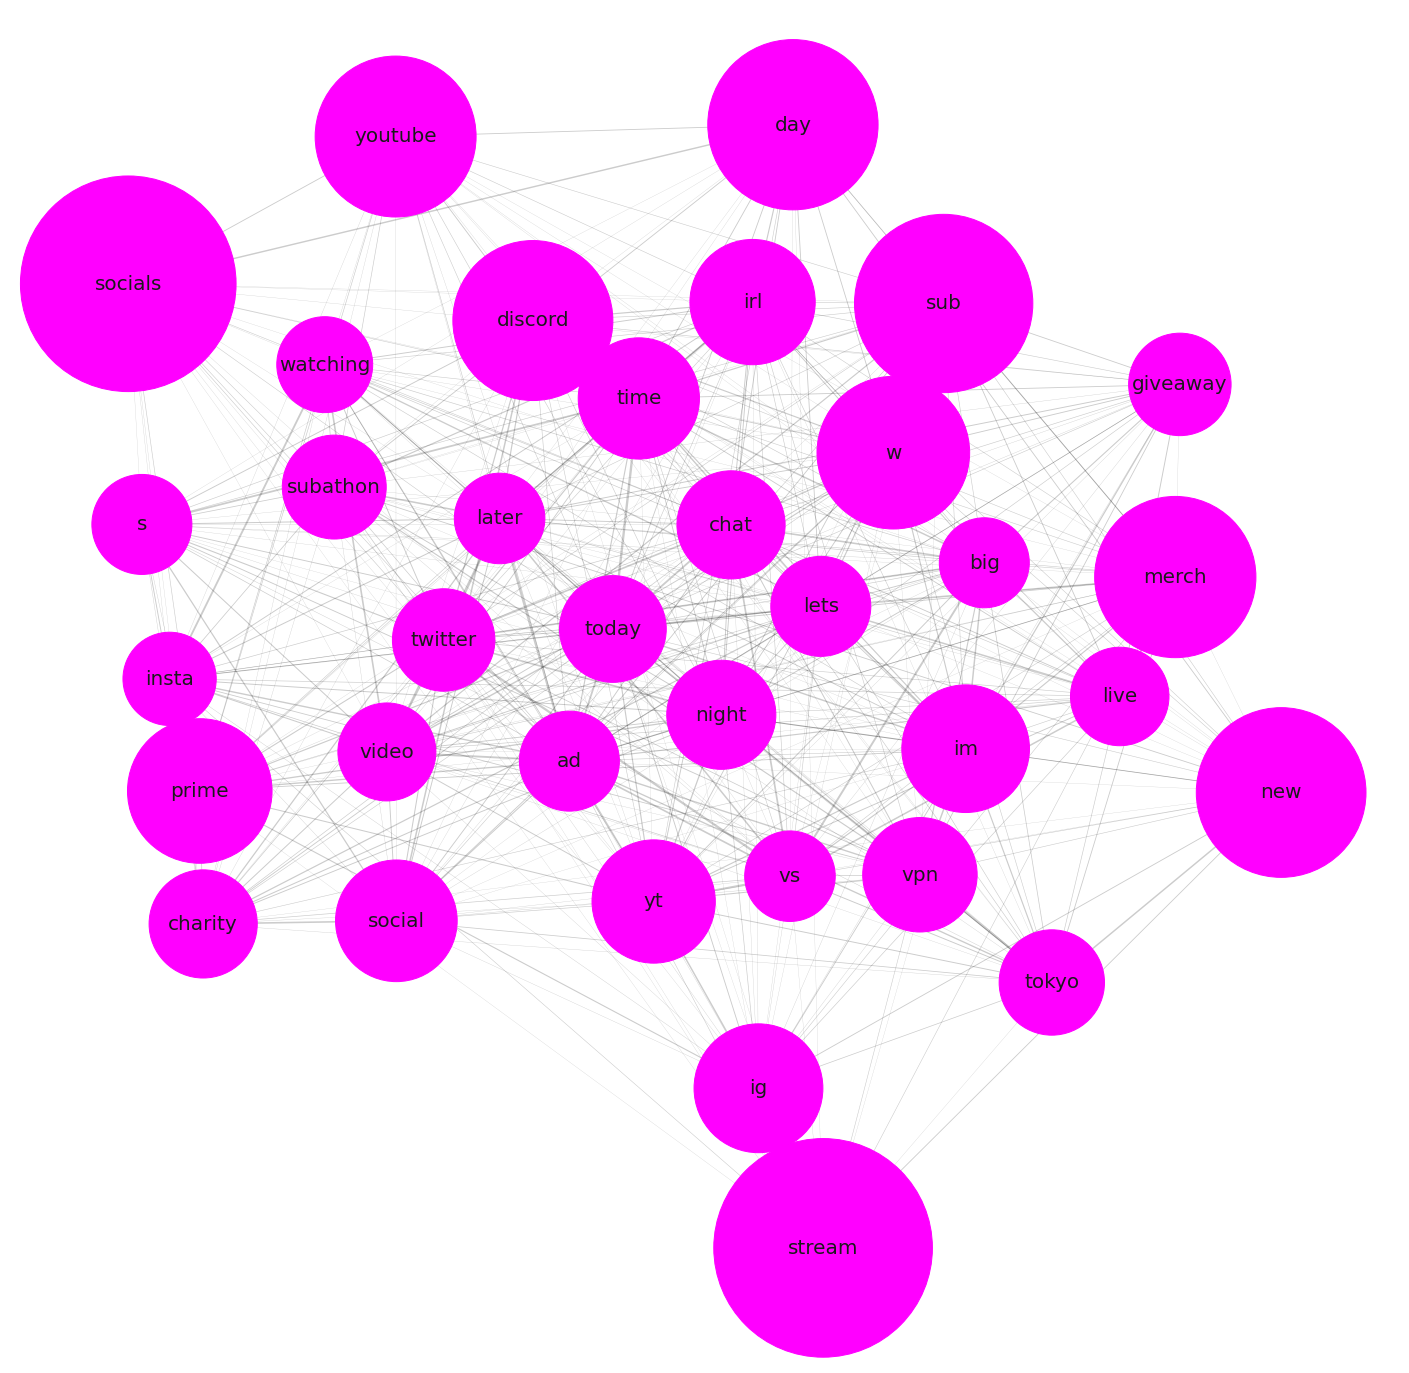

In [ ]:
G = nx.Graph()
G.nodes(data=True)

#creating nodes for each combo of words
#jaccard matrix matches ordered re_vocab dictionary
#imputing enumerated values from re_vocab word pair combo as nodes with count from word_cnt and weight jaccard

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)

#The weight of a node is the sum of the weights of the edges connected to the node.
       
plt.figure(figsize=(25,25))
#algorithmically defining position
pos = nx.spring_layout(G, k=0.1)

#use count of word as node size

node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='fuchsia', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, font_family= 'Tahoma', font_size= 20)

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()

# Exploring YouTube Data

In [ ]:
#america got talent videos appear 169 times in the youtube trending tabs (unique?)
#1148 unique videos appeard on the youtube trending tab during the duration
# min view count is 74... , data is right skewed 

youtube_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,11783,NaN,NaN,NaN,5891,3401.6,0,2945.5,5891,8836.5,11782
reference_index,11783,NaN,NaN,NaN,23.6104,13.9866,0,12,24,36,49
username,11783,1303,America's Got Talent,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_title,11783,1910,Ed Sheeran - Bad Habits [Official Video],74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publish_time,11783,1878,2021-06-25T04:00:33Z,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view_count,11783,NaN,NaN,NaN,7.98687e+06,1.60045e+07,65009,1.03288e+06,2.54451e+06,6.96942e+06,1.50066e+08
comment_count,11783,NaN,NaN,NaN,23365.9,87742.1,0,2500,6386,16928,1.1064e+06
like_count,11783,NaN,NaN,NaN,351735,633044,589,46449,124633,360195,7.42521e+06
dislike count,11783,NaN,NaN,NaN,10204.1,23490.7,17,722.5,2002,7422,252543
api_call_time,11783,245,2021-07-07T08:37:06.917556,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Username Statistics

In [ ]:
youtube_data.columns

Index(['Unnamed: 0', 'reference_index', 'username', 'video_title',
       'publish_time', 'view_count', 'comment_count', 'like_count',
       'dislike count', 'api_call_time', 'date_api_call_time',
       'hour_api_call_time', 'tokenised_title',
       'tokenised_titles_with_stopwords', 'genre', 'words_in_names'],
      dtype='object')

In [ ]:
#finding count unique usernames
#finding count unique words in usernames

youtube_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,11783,NaN,NaN,NaN,5891,3401.6,0,2945.5,5891,8836.5,11782
reference_index,11783,NaN,NaN,NaN,23.6104,13.9866,0,12,24,36,49
username,11783,1303,America's Got Talent,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_title,11783,1910,Ed Sheeran - Bad Habits [Official Video],74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publish_time,11783,1878,2021-06-25T04:00:33Z,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view_count,11783,NaN,NaN,NaN,7.98687e+06,1.60045e+07,65009,1.03288e+06,2.54451e+06,6.96942e+06,1.50066e+08
comment_count,11783,NaN,NaN,NaN,23365.9,87742.1,0,2500,6386,16928,1.1064e+06
like_count,11783,NaN,NaN,NaN,351735,633044,589,46449,124633,360195,7.42521e+06
dislike count,11783,NaN,NaN,NaN,10204.1,23490.7,17,722.5,2002,7422,252543
api_call_time,11783,245,2021-06-01T14:37:07.647127,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#filtering dataset for unique usernames

youtube_names = youtube_data.drop_duplicates(subset = ['username'])

In [ ]:
#finding how many observation did not contain any English words
youtube_data['words_in_names'].value_counts()[:20]

['got', 'en', 'tal', 'erica', 'alen', 'america', 'ta', 'len', 'lent', 'talent', 'al', 'eric', 'ame', 'mer', 'ale', 'er', 'ric', 'tale']                                                                         202
['ea', 'ast', 'mr', 'bea', 'st', 'beast', 'east']                                                                                                                                                               132
['ta', 'ai', 'entertainment', 'tai', 'er', 'te', 'enter', 'entertain', 'en', 'tain', 'men', 'ment']                                                                                                             127
['amil', 'good', 'fa', 'goo', 'family', 'wi', 'ly', 'fam', 'mil', 'od', 'win', 'ami', 'mi']                                                                                                                     121
['cat']                                                                                                                                                 

In [ ]:
import numpy as np

#count words in YouTube usernames
len_words_youtube = []

#eval becuase github transformed list into string

for words in youtube_names['words_in_names'].tolist():
  try:
    len_words_youtube.append(len(eval(words)))
  except:
    len_words_youtube.append(0)

#producing mean of count words in YouTube usernames
np.median(len_words_youtube)

8.0

In [ ]:
len(len_words_youtube)

1303

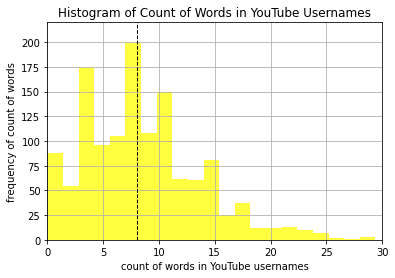

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# the histogram of the frequency of count of words in Twitch usernames data
plot = plt.hist(len_words_youtube, bins = 30, facecolor='yellow', alpha=0.75)
plt.axvline(np.median(len_words_youtube), color='k', linestyle='dashed', linewidth=1)




plt.xlabel('count of words in YouTube usernames')
plt.ylabel('frequency of count of words')
plt.title('Histogram of Count of Words in YouTube Usernames')
plt.xlim(0, 30)
plt.ylim(0, 220)
plt.grid(True)
plt.show()

## Correlation Triangle

Understanding whether it is reasonable to research other variables

In [ ]:
#keeping the youtube video with the highest viewership
youtube_data_unique = youtube_data.drop_duplicates(subset=['video_title'], keep='last') 

In [ ]:
youtube_data.columns.values

array(['Unnamed: 0', 'reference_index', 'username', 'video_title',
       'publish_time', 'view_count', 'comment_count', 'like_count',
       'dislike count', 'api_call_time', 'date_api_call_time',
       'hour_api_call_time', 'tokenised_title',
       'tokenised_titles_with_stopwords', 'genre', 'words_in_names'],
      dtype=object)

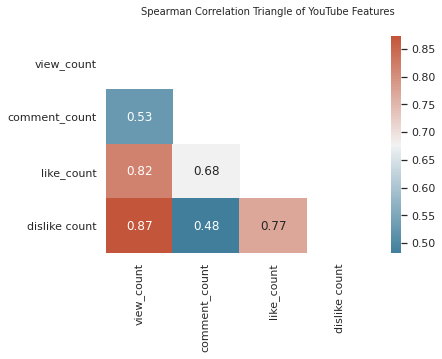

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


#strong spearman correlation between like count and viewcount (need null hypothesis)
#this relates to previous work done in the field

fig = plt.figure()
fig.suptitle('Spearman Correlation Triangle of YouTube Features', fontsize=10)

sn.set_theme(style="white")

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)


corr_matrix = youtube_data_unique[['view_count', 'comment_count', 'like_count', 'dislike count']].corr(method='spearman')


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sn.heatmap(corr_matrix, cmap = cmap, mask=mask, annot=True)



plt.show()

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
#reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr(youtube_data_unique['view_count'],
         youtube_data_unique['dislike count'])

SpearmanrResult(correlation=0.8740163865949241, pvalue=0.0)

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
#reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr(youtube_data_unique['view_count'],
         youtube_data_unique['comment_count'])

SpearmanrResult(correlation=0.5289124361928441, pvalue=3.7809751983138415e-138)

In [ ]:
youtube_data_unique['genre'].unique()

array(['Music', 'Youtuber', 'Traditional Media', 'Commercial', 'Trailer'],
      dtype=object)

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
#reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr( youtube_data_unique[youtube_data_unique['genre'] == 'Music']['view_count'],
         youtube_data_unique[youtube_data_unique['genre'] == 'Music']['comment_count'])

SpearmanrResult(correlation=0.5453350432891236, pvalue=6.3264214348968406e-21)

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
#reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr( youtube_data_unique[youtube_data_unique['genre'] == 'Youtuber']['view_count'],
         youtube_data_unique[youtube_data_unique['genre'] == 'Youtuber']['comment_count'])

SpearmanrResult(correlation=0.48926328969917315, pvalue=1.0047315157202006e-74)

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
#reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr( youtube_data_unique[youtube_data_unique['genre'] == 'Traditional Media']['view_count'],
         youtube_data_unique[youtube_data_unique['genre'] == 'Traditional Media']['comment_count'])

SpearmanrResult(correlation=0.6273319493906724, pvalue=1.3509249222513848e-38)

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
#reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr( youtube_data_unique[youtube_data_unique['genre'] == 'Commercial']['view_count'],
         youtube_data_unique[youtube_data_unique['genre'] == 'Commercial']['comment_count'])

SpearmanrResult(correlation=0.3200333425951654, pvalue=0.012675423059957924)

In [ ]:
from scipy.stats.stats import spearmanr

#deep dive into relationship between view count and comment count
# fail to reject null hyptohesis, with null hypothesis that there is no relationship

spearmanr( youtube_data_unique[youtube_data_unique['genre'] == 'Trailer']['view_count'],
         youtube_data_unique[youtube_data_unique['genre'] == 'Trailer']['comment_count'])

SpearmanrResult(correlation=0.8101604278074868, pvalue=1.1146635831857525e-08)

## Most occuring words on YouTube

In [ ]:
#creating word counter
#eval to handle lists encoded as strings by GitHub

word_cnt_youtube = {}

for words in youtube_data_unique['tokenised_title']:
    for word in eval(words): #looping through the tokens
        if word not in word_cnt_youtube:
            word_cnt_youtube[word] = 1
        else:
            word_cnt_youtube[word] += 1

#have to use key,value pairs because dataframe method requires a dictionary of lists    
word_cnt_df_youtube = pd.DataFrame({'word': [k for k in word_cnt_youtube.keys()], 'cnt': [v for v in word_cnt_youtube.values()]})
len(word_cnt_df_youtube)

4426

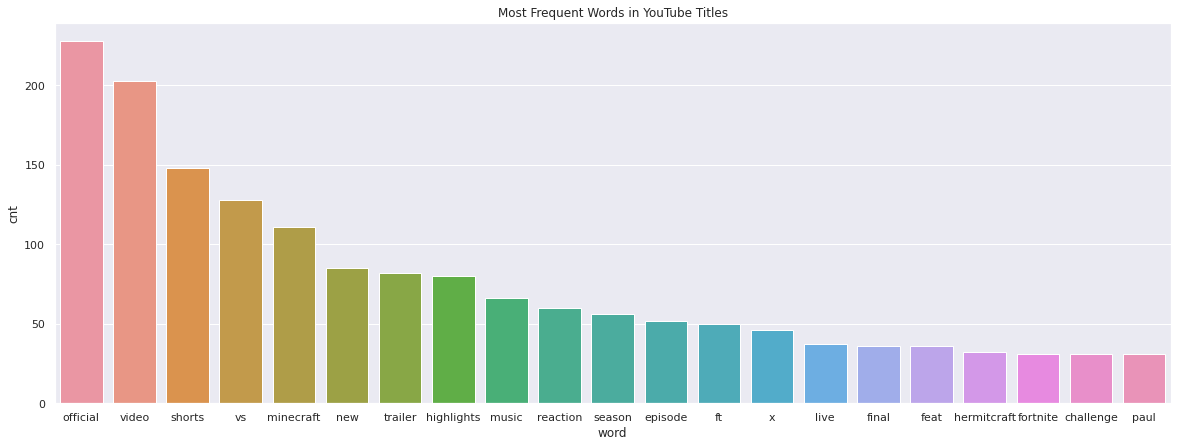

In [ ]:
import seaborn as sns

#plotting top words that appear more than 30 times in the data
top_words_youtube = word_cnt_df_youtube[word_cnt_df_youtube['cnt'] > 30].sort_values(by='cnt', ascending=False)
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.barplot(x = 'word', y='cnt', data = top_words_youtube).set(title='Most Frequent Words in YouTube Titles')

## WordCloud of words on YouTube

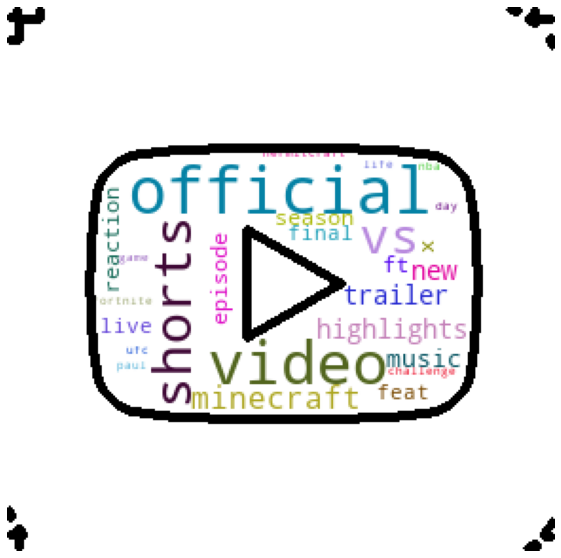

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np
import random

#getting tokenised titles
text_youtube = youtube_data_unique['tokenised_title']
mask = np.array(Image.open('/content/drive/MyDrive/youtube.png'))

wordcloud_youtube = WordCloud(mask=mask,width=mask.shape[1],
               height=mask.shape[0], background_color='white', contour_color='black',
               contour_width=5, 
               #colour funtion using random functions 
               color_func=lambda *args, **kwargs: (random.randint(0,250),random.randint(0,250),random.randint(0,250)),
               #seed for scientific replicability of results
               #using count to produce word cloud based on occurence
                max_words=26, max_font_size=512, random_state=42).generate_from_frequencies(word_cnt_youtube)

#setting figure shape
figure(figsize=(30, 10))


#producing plot
plt.imshow(wordcloud_youtube)
plt.axis('off')
plt.show()




## Co-Occurence Network Graph

In [ ]:
import re
import itertools
import unicodedata
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
# from spacy.tokenizer import Tokenizer
# import spacy

# #loading spacy encore model - need pip install it and restart runtime
# nlp = spacy.load('en_core_web_lg')


In [ ]:
#dictionary of most frequent words
#aim for maximum 60 words


vocab = {}
target_words = word_cnt_df_youtube[word_cnt_df_youtube['cnt'] > 20]['word'].to_numpy()

for word in target_words:
    if word not in vocab:
      #appending word: and count of when it happened
        vocab[word] = len(vocab)

re_vocab = {}
for word, i in vocab.items():
    re_vocab[i] = word
    
len(vocab)

34

In [ ]:
#creating all possible token combinations of tokens in unique docs
#combination  matrices are also known as co-occurence matrices
#eval to deal with GitHub processing lists as strings

title_combinations = [list(itertools.combinations(eval(words), 2)) for words in youtube_data_unique['tokenised_title']]
combination_matrix = np.zeros((len(vocab), len(vocab)))

for title_comb in title_combinations:
    for comb in title_comb:
      #if both tokens are top word
        if comb[0] in target_words and comb[1] in target_words:
          #place key,value of top words in vocab in comb matrix 
          #add one to indicate count of occurence
            combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
            combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1
        
for i in range(len(vocab)):
#compensating for duplication of results on main diagonal where key, value is value,key
    combination_matrix[i, i] /= 2
        
combination_matrix

array([[  0.,  19.,  13., ...,   0.,   0.,   0.],
       [ 19.,   0., 139., ...,   0.,   1.,   0.],
       [ 13., 139.,   2., ...,   2.,   2.,   0.],
       ...,
       [  0.,   0.,   2., ...,   0.,   0.,   0.],
       [  0.,   1.,   2., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [ ]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.05263158, 0.10526316, ..., 0.        , 0.05882353,
        0.        ],
       [0.05263158, 1.        , 0.18181818, ..., 0.        , 0.04166667,
        0.        ],
       [0.10526316, 0.18181818, 1.        , ..., 0.09090909, 0.04      ,
        0.        ],
       ...,
       [0.        , 0.        , 0.09090909, ..., 1.        , 0.05      ,
        0.        ],
       [0.05882353, 0.04166667, 0.04      , ..., 0.05      , 1.        ,
        0.13333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.13333333,
        1.        ]])

In [ ]:
nodes = []

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocab[i], re_vocab[j], word_cnt_youtube[re_vocab[i]], word_cnt_youtube[re_vocab[j]], jaccard])
            
len(nodes)

328

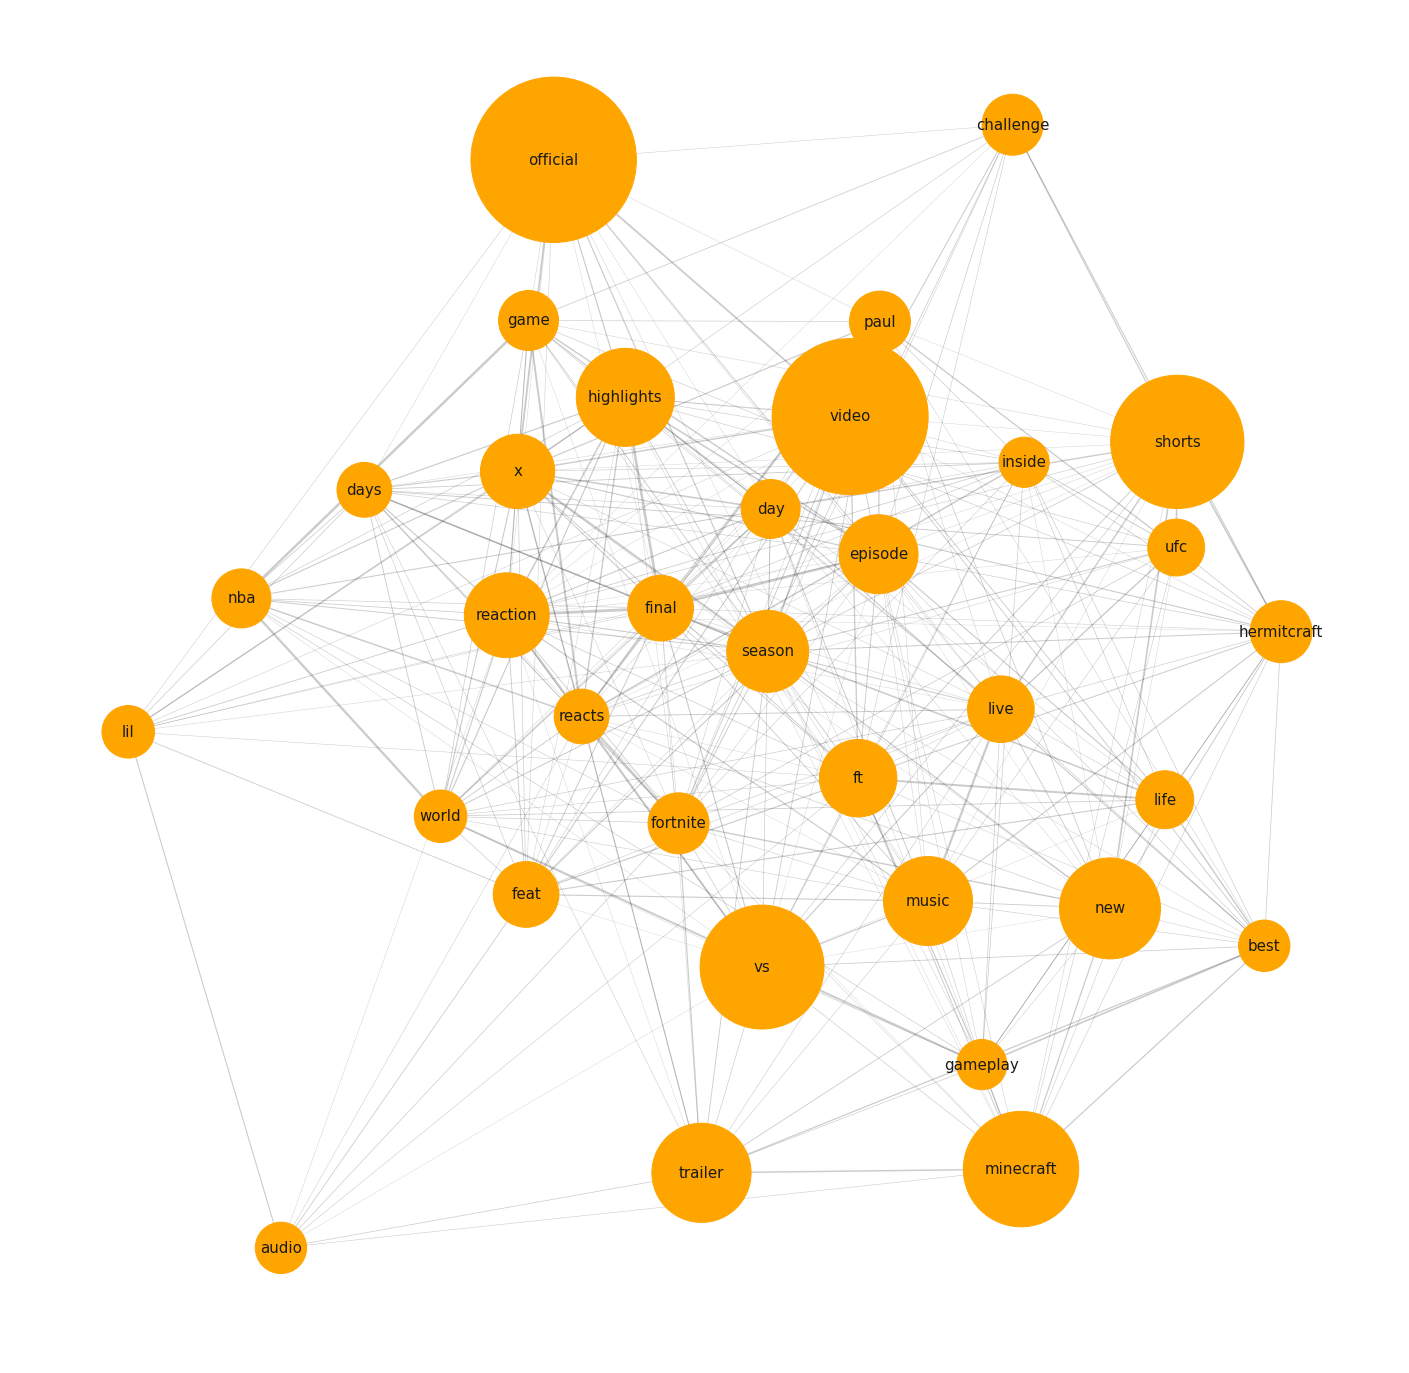

In [ ]:
G = nx.Graph()
G.nodes(data=True)

#creating nodes for each combo of words
#jaccard matrix matches ordered re_vocab dictionary
#imputing enumerated values from re_vocab word pair combo as nodes with count from word_cnt and weight jaccard

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
#The weight of a node is the sum of the weights of the edges connected to the node.
       
plt.figure(figsize=(25,25))
#algorithmically defining position
pos = nx.spring_layout(G, k=0.1)

#use count of word as node size

node_size = [d['count']*120 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='orange', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, font_family= 'Tahoma', font_size= 15)

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()